In [18]:
import numpy as np
from scipy.integrate import quad
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [19]:
def f(x):
    return 3.7 * np.cos(1.5 * x) * np.exp(-4 * x / 3) + 2.4 * np.sin(4.5 * x) * np.exp(2 * x / 3) + 4

def f_p(x):
    return (3.7 * np.cos(1.5 * x) * np.exp(-4 * x / 3) + 2.4 * np.sin(4.5 * x) * np.exp(2 * x / 3) + 4) * ((2.3 - x) ** (-3 / 5))


квадратурные формулы

In [20]:
#левый прямоугольник
def left_rectangle(a, b):
    return (b - a) * f(a)

#средний прямоугольник
def middle_rectangle(a, b):
    return (b - a) * f((a + b) / 2)

#трапеция (2 узла)
def trapezia(a, b):
    return (b - a) / 2 * (f(a) + f(b))
    
#Симпсон (3 узла)
def Simpson(a, b):
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))

моменты и узлы

In [21]:
def moment(z_1, z_2, j):
    return ((2.3 - z_1) ** (j - (3 / 5) + 1) - (2.3 - z_2) ** (j - (3 / 5) + 1)) / (j - (3 / 5) + 1)

def nodes(z_1, z_2):
    x = [z_1, (z_1 + z_2) / 2, z_2]
    return x

Ньютон-Котс

In [22]:
def Nuthon_Kots(a_1, b_1, n):
    mu = np.array([moment(a_1, b_1, i) for i in range(n)])
    z_1 = 2.3 - b_1
    z_2 = 2.3 - a_1
    t = nodes(z_1, z_2)
    P = np.array([np.array([t[i] ** s for i in range(n)]) for s in range(n)])
    A = np.linalg.solve(P, mu)
    result = 0
    for i in range(n):
        result += A[i] * f(2.3 - t[i])
    return result

кордан

In [23]:
def polynom_coeff(mu, n):
    y = np.array([-mu[n + s] for s in range(n)])
    P = np.array([np.array([mu[j + s] for j in range(n)]) for s in range(n)])
    a_coeff = np.linalg.solve(P, y)
    return a_coeff

def Kordan(a_coeff):
    q = ((2 * a_coeff[2] ** 3) / 27 - a_coeff[2] * a_coeff[1] / 3 + a_coeff[0]) / 2
    p = (3 * a_coeff[1] - a_coeff[2] ** 2) / 9
    r = np.sqrt(abs(p)) * np.sign(q)
    phi = np.arccos(q / r ** 3)
    y = np.empty(3)
    y[0] = -2 * r * np.cos(phi / 3)
    y[1] = 2 * r * np.cos(np.pi / 3 - phi / 3)
    y[2] = 2 * r * np.cos(np.pi / 3 + phi / 3)
    #print(y)
    t = np.array([y[i] - a_coeff[2] / 3 for i in range(3)])
    t.sort()
    return t

гаусс

In [24]:
def Gauss(a_1, b_1, n):
    mu = [moment(a_1, b_1, i) for i in range(2*n)]
    a_coeff = polynom_coeff(mu, n)
    t = Kordan(a_coeff)
    y = np.array([mu[i] for i in range(n)])
    P = np.array([np.array([t[i] ** s for i in range(n)]) for s in range(n)])
    A = np.linalg.solve(P, y)
    result = 0
    for i in range(len(A)):
        result += A[i] * f(2.3 - t[i])
    return result

таблица

In [25]:
a = 1.8
b = 2.3
znach1 = quad(f, a, b)[0]
znach2 = quad(f_p, a, b)[0]
print(znach1, znach2)
number_of_segments = [1]
absolute_error = [[], [], [], [], [], [], []]

absolute_error[0].append(abs(left_rectangle(a, b) - znach1))
absolute_error[1].append(abs(middle_rectangle(a, b) - znach1))
absolute_error[2].append(abs(trapezia(a, b) - znach1))
absolute_error[3].append(abs(Simpson(a, b) - znach1))
absolute_error[4].append(abs(Nuthon_Kots(a, b, 3) - znach2))
absolute_error[5].append(abs(Gauss(a, b, 3) - znach2))

table = PrettyTable(["Количество разбиений","КФ левого прямоугольника", "КФ среднего прямоугольника", "КФ трапеции", "КФ симпсона","КФ Ньютон-Котса", "КФ Гаусса"])
table.add_row([1, left_rectangle(a, b), middle_rectangle(a, b), trapezia(a, b), Simpson(a, b), Nuthon_Kots(a, b, 3), Gauss(a, b, 3)])


for j in range(9, 50, 5):
    number_of_segments.append(j + 1)
    h = (b - a) / j
    l_r = 0
    m_r = 0
    tr = 0
    sim = 0
    n_k = 0
    g = 0
    for i in range(j):
        a_1 = a + h * i
        b_1 = a + h * (i + 1)
        l_r += left_rectangle(a_1, b_1)
        m_r += middle_rectangle(a_1, b_1)
        tr += trapezia(a_1, b_1)
        sim += Simpson(a_1, b_1)
        n_k += Nuthon_Kots(a_1, b_1, 3)
        g += Gauss(a_1, b_1, 3)
    absolute_error[0].append(abs(l_r - znach1))
    absolute_error[1].append(abs(m_r - znach1))
    absolute_error[2].append(abs(tr - znach1))
    absolute_error[3].append(abs(sim - znach1))
    absolute_error[4].append(abs(n_k - znach2))
    absolute_error[5].append(abs(g - znach2))
    table.add_row([j + 1, l_r, m_r, tr, sim, n_k, g])
print(table)

2.3788019296148555 1.1851419749802814
+----------------------+--------------------------+----------------------------+--------------------+--------------------+--------------------+--------------------+
| Количество разбиений | КФ левого прямоугольника | КФ среднего прямоугольника |    КФ трапеции     |    КФ симпсона     |  КФ Ньютон-Котса   |     КФ Гаусса      |
+----------------------+--------------------------+----------------------------+--------------------+--------------------+--------------------+--------------------+
|          1           |     5.71244827646476     |     2.814066165068772      | 1.5945106786017333 | 2.4075476695797593 | 1.5552047244590785 | 1.1860891149419297 |
|          10          |    2.828017937389789     |      2.38297357842567      | 2.3704693154050083 | 2.378805490752116  | 1.1854185010045306 | 1.1851419759732762 |
|          15          |    2.6695002041800766    |     2.380522903247719      | 2.375361804332717  | 2.378802536942718  | 1.185204099637

графики

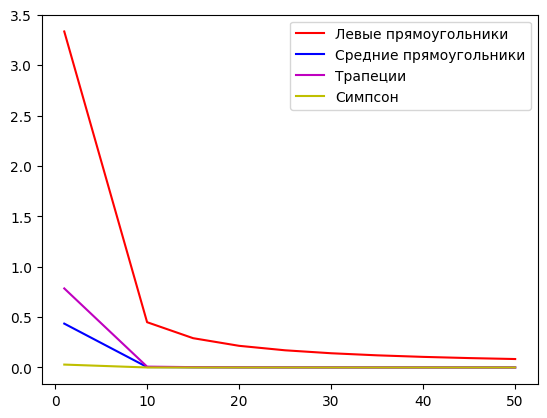

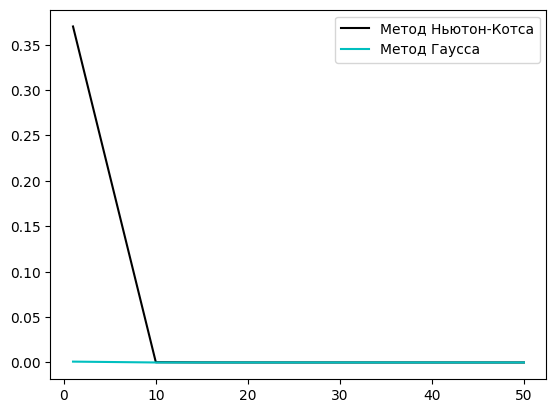

In [26]:
plt.figure()
plt.plot(number_of_segments, absolute_error[0], 'r', label = "Левые прямоугольники")
plt.plot(number_of_segments, absolute_error[1], 'b', label = "Средние прямоугольники")
plt.plot(number_of_segments, absolute_error[2], 'm', label = "Трапеции")
plt.plot(number_of_segments, absolute_error[3], 'y', label = "Симпсон")

plt.legend()
plt.figure()
plt.plot(number_of_segments, absolute_error[4], 'k', label = "Метод Ньютон-Котса")
plt.plot(number_of_segments, absolute_error[5], 'c', label = "Метод Гаусса")
plt.legend()
plt.show()

узлы

In [ ]:
def S_found_1(h, a , b):
    j = int((b - a) / h)
    S = 0
    for i in range(j):
        a_1 = a + h * i
        b_1 = a + h * (i + 1)
        S += Nuthon_Kots(a_1, b_1, 3)
    return S

def R_found(r, S, h):
    m = -np.log(abs((S[len(h) - 1] - S[len(h) - 2]) / (S[len(h) - 2] - S[len(h) - 3]))) / np.log(2)
   # print(m)
    P = np.array([np.array([h[j] ** (m + i) - h[j + 1] ** (m + i) for i in range(r)]) for j in range(len(h) - 1)])
    y = np.array([S[i + 1] - S[i] for i in range(len(h)-1)])

    C = np.linalg.solve(P, y)
    R = []
    for j in range (len(h)):
        summ = 0
        for i in range(r):
            summ += C[i] * h[j] ** (m + i)
        R.append(summ)
    return R


In [28]:
def h_norm(a, b):
    h = np.array([(b - a) / 2])
    h = np.append(h, h[0] / 2)
    h = np.append(h, h[1] / 2)
    return h

def h_opt(a, b):
    h = np.array([(b - a) / 2])
    h = np.append(h, h[0] / 2)
    h = np.append(h, h[1] / 2)
    r = 2
    S = np.array([S_found_1(h[0], a, b), S_found_1(h[1], a, b), S_found_1(h[2], a, b)])
    R = R_found(r, S, h)
    m = -np.log(abs((S[len(h) - 1] - S[len(h) - 2]) / (S[len(h) - 2] - S[len(h) - 3]))) / np.log(2)
    h_opt = np.array([h[0]*(1e-6/abs(R[0]))**(1/m)])
    h_opt = np.append(h_opt, h_opt[0] / 2)
    h_opt = np.append(h_opt, h_opt[1] / 2)

    return h_opt

шаг с требуемой точностью

In [29]:
def error_of_NK(a, b, h):
    r = 2
    S = np.array([S_found_1(h[0], a, b), S_found_1(h[1], a, b), S_found_1(h[2], a, b)])
    R = R_found(r, S, h)
    while abs(R[len(R) - 1]) > 1e-6:
        r += 1
        h = np.append(h, h[r - 1] / 2)
        S = np.append(S, S_found_1(h[r], a, b))
        R = R_found(r, S, h)
    return(h[len(h) - 1])

вывод

In [30]:
a = 1.8
b = 2.3
h = h_norm(a, b)
h_n_k = error_of_NK(a, b, h)
print()
h_opt = h_opt(a, b)
h_n_k_opt = error_of_NK(a, b, h_opt)

znach1 = quad(f_p, a, b)[0]
znach2 = S_found_1(h_n_k, a, b)
print(abs(znach2-znach1), znach1, znach2)
table = PrettyTable(["", "Длина шага h разбиения КФ Ньютон-Котса"])
table.add_row(["Без вычисления h_opt", h_n_k])
table.add_row(["C вычислением h_opt", h_n_k_opt])
print(table)


3.5985641644309396e-07 1.1851419749802814 1.1851423348366978
+----------------------+----------------------------------------+
|                      | Длина шага h разбиения КФ Ньютон-Котса |
+----------------------+----------------------------------------+
| Без вычисления h_opt |         0.0078124999999999965          |
| C вычислением h_opt  |           0.0024902908991091           |
+----------------------+----------------------------------------+
